## ARIMA MODEL - UNIVARIATE

In [58]:
# Read in datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

USA_train_imputed = pd.read_csv("USA_train.csv")
USA_test_imputed = pd.read_csv("USA_test.csv")
USA_train_imputed.set_index('date', inplace=True)
USA_test_imputed.set_index('date', inplace=True)

Brazil_train_imputed = pd.read_csv("Brazil_train.csv")
Brazil_test_imputed = pd.read_csv("Brazil_test.csv")
Brazil_train_imputed.set_index('date', inplace=True)
Brazil_test_imputed.set_index('date', inplace=True)

Germany_train_imputed = pd.read_csv("Germany_train.csv")
Germany_test_imputed = pd.read_csv("Germany_test.csv")
Germany_train_imputed.set_index('date', inplace=True)
Germany_test_imputed.set_index('date', inplace=True)

Nigeria_train_imputed = pd.read_csv("Nigeria_train.csv")
Nigeria_test_imputed = pd.read_csv("Nigeria_test.csv")
Nigeria_train_imputed.set_index('date', inplace=True)
Nigeria_test_imputed.set_index('date', inplace=True)

China_train_imputed = pd.read_csv("China_train.csv")
China_test_imputed = pd.read_csv("China_test.csv")
China_train_imputed.set_index('date', inplace=True)
China_test_imputed.set_index('date', inplace=True)

Australia_train_imputed = pd.read_csv("Australia_train.csv")
Australia_test_imputed = pd.read_csv("Australia_test.csv")
Australia_train_imputed.set_index('date', inplace=True)
Australia_test_imputed.set_index('date', inplace=True)

### Checking for stationarity - all datasets

In [59]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(USA_train_imputed['new_cases'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])
# Dataset not stationary

ADF Statistic: 0.35350791999423303
p-value: 0.9796705291813943
Critical Values: {'1%': -3.4398077121659765, '5%': -2.865713608066101, '10%': -2.5689925469026402}


In [60]:
USA_train_imputed['new_cases'] += 0.0000001
USA_log = np.log(USA_train_imputed['new_cases'])
result = adfuller(USA_log)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])
# Dataset now stationary after log transformation

ADF Statistic: -3.720782797356681
p-value: 0.0038301427547293276
Critical Values: {'1%': -3.439876604020831, '5%': -2.8657439615125675, '10%': -2.5690087183208665}


In [61]:
result = adfuller(Brazil_train_imputed['new_cases'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])
# Dataset not stationary

ADF Statistic: -1.3451697006245777
p-value: 0.6082623029077234
Critical Values: {'1%': -3.440388459298194, '5%': -2.8659694611921034, '10%': -2.569128861019929}


In [62]:
Brazil_train_imputed['new_cases'] += 0.0000001
Brazil_log = np.log(Brazil_train_imputed['new_cases'])
result = adfuller(Brazil_log)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])
# Dataset now stationary after log transformation

ADF Statistic: -3.5016065203650584
p-value: 0.007945930945517227
Critical Values: {'1%': -3.440388459298194, '5%': -2.8659694611921034, '10%': -2.569128861019929}


In [63]:
result = adfuller(Germany_train_imputed['new_cases'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])
# Dataset is stationary

ADF Statistic: -3.0337856122622235
p-value: 0.031857457632445484
Critical Values: {'1%': -3.439946506895534, '5%': -2.8657747597081404, '10%': -2.5690251267911495}


In [64]:
result = adfuller(Nigeria_train_imputed['new_cases'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])
# Dataset is stationary

ADF Statistic: -2.90770238830385
p-value: 0.04445961806463643
Critical Values: {'1%': -3.440419374623044, '5%': -2.865983079837035, '10%': -2.5691361169972526}


In [65]:
result = adfuller(China_train_imputed['new_cases'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])
# Dataset is stationary

ADF Statistic: -7.529759014914354
p-value: 3.604559833669864e-11
Critical Values: {'1%': -3.4398627454742488, '5%': -2.8657378555534248, '10%': -2.569005465238395}


In [66]:
result = adfuller(Australia_train_imputed['new_cases'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])
# Dataset not stationary

ADF Statistic: 0.32767689462415905
p-value: 0.9785792556801218
Critical Values: {'1%': -3.439918423003054, '5%': -2.865762386436236, '10%': -2.5690185346241785}


In [67]:
Australia_train_imputed['new_cases'] += 0.0000001
Australia_log = np.log(Australia_train_imputed['new_cases'])
result = adfuller(Australia_log)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])
# Dataset now stationary after log transformation

ADF Statistic: -6.1579186738228575
p-value: 7.292088765604644e-08
Critical Values: {'1%': -3.4399324443722814, '5%': -2.865768564020576, '10%': -2.5690218258831052}


In [68]:
# TUNING FUNCTIONS
def evaluate_arima_model(train, test, arima_order):
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
   
    error = np.sqrt(mean_squared_error(test, predictions))
    return error

def evaluate_models(train, test, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    print(best_score)
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                print(order)
                mse = evaluate_arima_model(train, test, order)
                if mse < best_score:
                    best_score, best_cfg = mse, order
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

### USA

<AxesSubplot:xlabel='date'>

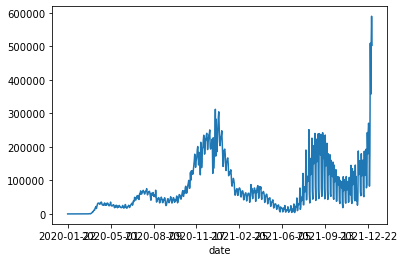

In [69]:
USA_train_imputed['new_cases'].plot()

In [70]:
# As log is needed for stationarity, we will take log
USA_train_target = USA_train_imputed['new_cases']
USA_test_target = USA_test_imputed['new_cases']
USA_train_log = np.log(USA_train_target)
USA_test_log = np.log(USA_test_target)
#USA_train_log.plot()

In [71]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [75]:
split_index = int(len(USA_train_target) * 0.9)
USA_train_train_target = USA_train_log[:split_index]
USA_train_test_target = USA_train_log[split_index:]

In [96]:
# Tune using train error, A MORE EXHAUSTIVE GRID SEARCH WAS INITIALLY CONDUCTED. TO ENSURE THAT REPEATED RUNNING 
# OF CODE WOULDN'T TAKE TOO LONG, THAT GRID SEARCH ISN'T SHOWN HERE. MORE DETAILS IN REPORT.
p_values = [1,2,7]
d_values = [1]
q_values = [1,2]


warnings.filterwarnings("ignore")
evaluate_models(USA_train_train_target, USA_train_test_target, p_values, d_values, q_values)
# Best was 7,1,2

inf
(1, 1, 1)
(1, 1, 2)
(2, 1, 1)
(2, 1, 2)
(7, 1, 1)
(7, 1, 2)
Best ARIMA(7, 1, 2) MSE=0.619


In [97]:
# FIND RMSE on TRAINING DATASET
history = [x for x in USA_train_train_target]
USA_train_predictions = list()
for t in range(len(USA_train_test_target)):
    model = ARIMA(history, order=(7,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    USA_train_predictions.append(yhat)
    obs = USA_train_test_target[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
np.sqrt(mean_squared_error(np.exp(USA_train_predictions), np.exp(USA_train_test_target)))

predicted=11.243610, expected=11.475971
predicted=11.363663, expected=10.368007
predicted=10.999123, expected=9.828764
predicted=10.822320, expected=11.618303
predicted=10.684052, expected=11.144886
predicted=10.862558, expected=11.536300
predicted=11.457759, expected=11.235088
predicted=11.122891, expected=11.462874
predicted=11.162992, expected=10.429842
predicted=11.187454, expected=10.374054
predicted=10.786972, expected=11.621448
predicted=10.918982, expected=11.169702
predicted=10.910820, expected=11.354434
predicted=11.315388, expected=11.311091
predicted=11.217614, expected=11.479151
predicted=11.186942, expected=10.451696
predicted=11.173971, expected=10.499628
predicted=10.938004, expected=11.599351
predicted=10.844172, expected=11.289257
predicted=11.190132, expected=11.469015
predicted=11.445479, expected=10.944859
predicted=11.126622, expected=11.883205
predicted=11.214311, expected=10.680470
predicted=11.337686, expected=10.348494
predicted=11.021786, expected=11.811629
p

80840.34751153976

In [98]:
# Make Test Predictions
history = [x for x in USA_train_log]
USA_predictions = list()
for t in range(len(USA_test_log)):
    model = ARIMA(history, order=(7,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    USA_predictions.append(yhat)
    obs = USA_test_log[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=12.880259, expected=12.107478
predicted=12.913885, expected=12.535574
predicted=12.710228, expected=13.888933
predicted=12.680061, expected=13.599637
predicted=13.440222, expected=13.377004
predicted=13.539440, expected=13.611050
predicted=13.165420, expected=13.660455
predicted=13.505974, expected=12.864178
predicted=13.384517, expected=13.073171
predicted=13.233196, expected=14.128982
predicted=13.443189, expected=13.553449
predicted=13.498273, expected=13.720629
predicted=13.762749, expected=13.641877
predicted=13.630581, expected=13.664138
predicted=13.437169, expected=12.885085
predicted=13.613145, expected=13.056937
predicted=13.308446, expected=13.402469
predicted=13.120350, expected=13.922742
predicted=13.520120, expected=13.814155
predicted=13.707892, expected=13.474457
predicted=13.560945, expected=13.620699
predicted=13.584695, expected=12.566254
predicted=13.303831, expected=12.783335
predicted=13.077431, expected=13.713719
predicted=13.174293, expected=13.077619


In [99]:
#TEST RMSE
rmse = np.sqrt(mean_squared_error(USA_test_imputed['new_cases'], np.exp(USA_predictions)))
rmse

233825.86811309864

<AxesSubplot:xlabel='date'>

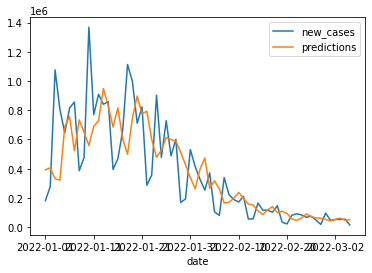

In [100]:
USA_test_imputed['predictions'] = np.exp(USA_predictions)
USA_test_imputed.plot(y=["new_cases", "predictions"])

### BRAZIL

<AxesSubplot:xlabel='date'>

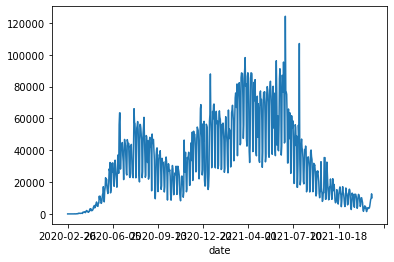

In [101]:
Brazil_train_imputed['new_cases'].plot()

In [103]:
# As log is needed for stationarity, we will take log
Brazil_train_target = Brazil_train_imputed['new_cases']
Brazil_test_target = Brazil_test_imputed['new_cases']
Brazil_train_log = np.log(Brazil_train_target)
Brazil_test_log = np.log(Brazil_test_target)
#Brazil_train_log.plot()

In [104]:
split_index = int(len(Brazil_train_target) * 0.9)
Brazil_train_train_target = Brazil_train_log[:split_index]
Brazil_train_test_target = Brazil_train_log[split_index:]

In [108]:
# Tune using train error, A MORE EXHAUSTIVE GRID SEARCH WAS INITIALLY CONDUCTED. TO ENSURE THAT REPEATED RUNNING 
# OF CODE WOULDN'T TAKE TOO LONG, THAT GRID SEARCH ISN'T SHOWN HERE. MORE DETAILS IN REPORT.
p_values = [1,2,7]
d_values = [1]
q_values = [2]


warnings.filterwarnings("ignore")
evaluate_models(Brazil_train_train_target, Brazil_train_test_target, p_values, d_values, q_values)
# Best was 7,1,2

inf
(1, 1, 2)
(2, 1, 2)
(7, 1, 2)
Best ARIMA(7, 1, 2) MSE=0.519


In [109]:
# FIND RMSE on TRAINING DATASET
history = [x for x in Brazil_train_train_target]
Brazil_train_predictions = list()
for t in range(len(Brazil_train_test_target)):
    model = ARIMA(history, order=(7,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    Brazil_train_predictions.append(yhat)
    obs = Brazil_train_test_target[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
np.sqrt(mean_squared_error(np.exp(Brazil_train_predictions), np.exp(Brazil_train_test_target)))

predicted=9.438141, expected=8.965335
predicted=9.020021, expected=9.498897
predicted=9.309970, expected=9.748236
predicted=9.072494, expected=9.524129
predicted=9.552061, expected=9.447860
predicted=9.282688, expected=9.211540
predicted=9.233915, expected=8.720950
predicted=9.269169, expected=8.439448
predicted=9.054573, expected=8.685754
predicted=8.955887, expected=9.699534
predicted=8.897815, expected=9.491526
predicted=9.121523, expected=9.472551
predicted=9.193889, expected=9.321255
predicted=9.264954, expected=8.641356
predicted=8.959060, expected=8.836519
predicted=9.158332, expected=9.376702
predicted=9.192141, expected=9.614471
predicted=9.079556, expected=9.651044
predicted=9.476530, expected=9.588708
predicted=9.339025, expected=9.143987
predicted=9.298602, expected=8.366835
predicted=9.156985, expected=7.916807
predicted=8.927244, expected=8.789965
predicted=8.742385, expected=9.481283
predicted=8.797979, expected=9.341544
predicted=8.941895, expected=9.423272
predicted=9.

3815.666987968374

In [110]:
# Make Test Predictions
history = [x for x in Brazil_train_log]
Brazil_predictions = list()
for t in range(len(Brazil_test_log)):
    model = ARIMA(history, order=(7,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    Brazil_predictions.append(yhat)
    obs = Brazil_test_log[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=9.223673, expected=8.238008
predicted=8.839353, expected=7.498870
predicted=8.854274, expected=9.363405
predicted=8.664405, expected=9.861154
predicted=8.937211, expected=10.036794
predicted=9.306624, expected=10.486429
predicted=9.835279, expected=11.055514
predicted=9.724644, expected=10.805740
predicted=10.250434, expected=10.297487
predicted=10.841605, expected=10.431790
predicted=10.545079, expected=11.201702
predicted=10.948314, expected=11.383648
predicted=10.936175, expected=11.492161
predicted=11.557065, expected=11.618294
predicted=11.287877, expected=10.790597
predicted=11.412982, expected=10.412622
predicted=11.138850, expected=11.216956
predicted=11.505598, expected=11.851838
predicted=11.185499, expected=12.183525
predicted=11.919257, expected=12.042294
predicted=11.805028, expected=12.051294
predicted=11.996474, expected=12.014367
predicted=11.910678, expected=11.718280
predicted=12.298317, expected=11.380844
predicted=11.976944, expected=12.207522
predicted=12

In [111]:
#TEST RMSE
rmse = np.sqrt(mean_squared_error(Brazil_test_imputed['new_cases'], np.exp(Brazil_predictions)))
rmse

53829.17143219262

<AxesSubplot:xlabel='date'>

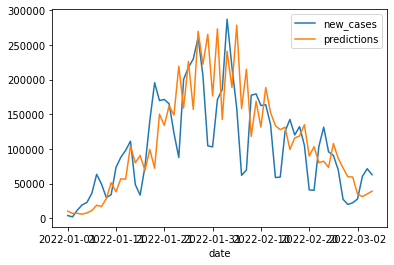

In [112]:
Brazil_test_imputed['predictions'] = np.exp(Brazil_predictions)
Brazil_test_imputed.plot(y=["new_cases", "predictions"])

### GERMANY

In [113]:
# As Germany Data was stationary, no need for log transformation
# A MORE EXHAUSTIVE GRID SEARCH WAS INITIALLY CONDUCTED. TO ENSURE THAT REPEATED RUNNING 
# OF CODE WOULDN'T TAKE TOO LONG, THAT GRID SEARCH ISN'T SHOWN HERE. MORE DETAILS IN REPORT.
Germany_train_target = Germany_train_imputed['new_cases']
Germany_test_target = Germany_test_imputed['new_cases']
split_index = int(len(Germany_train_target) * 0.9)
Germany_train_train_target = Germany_train_target[:split_index]
Germany_train_test_target = Germany_train_target[split_index:]

p_values = [1,2,7]
d_values = [1]
q_values = [1, 2]


warnings.filterwarnings("ignore")
evaluate_models(Germany_train_train_target, Germany_train_test_target, p_values, d_values, q_values)
# Best was 7,1,1, with a training RMSE (ignore MSE, typo in function) of 16,508.419

inf
(1, 1, 1)
(1, 1, 2)
(2, 1, 1)
(2, 1, 2)
(7, 1, 1)
(7, 1, 2)
Best ARIMA(7, 1, 1) MSE=16708.419


In [114]:
# Make testing predictions
history = [x for x in Germany_train_target]
Germany_predictions = list()
for t in range(len(Germany_test_target)):
    model = ARIMA(history, order=(7,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    Germany_predictions.append(yhat)
    obs = Germany_test_target[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=14683.587747, expected=2968.000000
predicted=5714.118673, expected=12636.000000
predicted=16456.107237, expected=50013.000000
predicted=45522.185846, expected=61905.000000
predicted=63363.063682, expected=67337.000000
predicted=42540.514569, expected=59110.000000
predicted=25481.053610, expected=52621.000000
predicted=21306.595163, expected=32128.000000
predicted=34804.672969, expected=21839.000000
predicted=49331.547117, expected=16618.000000
predicted=50865.656072, expected=120271.000000
predicted=73671.077537, expected=86232.000000
predicted=80340.149227, expected=89920.000000
predicted=58755.338411, expected=77175.000000
predicted=42411.657911, expected=44251.000000
predicted=33950.685252, expected=33129.000000
predicted=55789.737385, expected=82818.000000
predicted=106167.038795, expected=118105.000000
predicted=108000.007201, expected=139000.000000
predicted=115863.820923, expected=140870.000000
predicted=99429.499886, expected=133329.000000
predicted=82474.531296, expe

In [115]:
# TEST RMSE
rmse = np.sqrt(mean_squared_error(Germany_test_target, Germany_predictions))
rmse

65069.642440343065

<AxesSubplot:xlabel='date'>

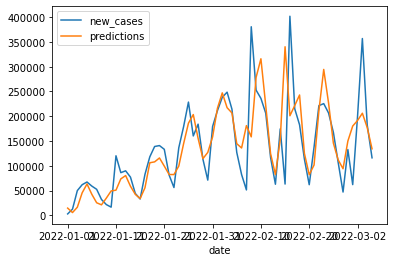

In [116]:
Germany_test_imputed['predictions'] = Germany_predictions
Germany_test_imputed.plot(y=["new_cases", "predictions"])

### NIGERIA

In [118]:
# As Nigeria Data was stationary, no need for log transformation
# A MORE EXHAUSTIVE GRID SEARCH WAS INITIALLY CONDUCTED. TO ENSURE THAT REPEATED RUNNING 
# OF CODE WOULDN'T TAKE TOO LONG, THAT GRID SEARCH ISN'T SHOWN HERE. MORE DETAILS IN REPORT.

Nigeria_train_target = Nigeria_train_imputed['new_cases']
Nigeria_test_target = Nigeria_test_imputed['new_cases']
split_index = int(len(Nigeria_train_target) * 0.9)
Nigeria_train_train_target = Nigeria_train_target[:split_index]
Nigeria_train_test_target = Nigeria_train_target[split_index:]

p_values = [1,2,7]
d_values = [1]
q_values = [1, 2]


warnings.filterwarnings("ignore")
evaluate_models(Nigeria_train_train_target, Nigeria_train_test_target, p_values, d_values, q_values)
# Best was 1,1,1 with an RMSE of 792.63 (again ignore fact it displays MSE, it really is RMSE)

inf
(1, 1, 1)
(1, 1, 2)
(2, 1, 1)
(2, 1, 2)
(7, 1, 1)
(7, 1, 2)
Best ARIMA(1, 1, 1) MSE=792.630


In [119]:
# Make testing predictions
history = [x for x in Nigeria_train_target]
Nigeria_predictions = list()
for t in range(len(Nigeria_test_target)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    Nigeria_predictions.append(yhat)
    obs = Nigeria_test_target[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=1073.895710, expected=1364.000000
predicted=983.323350, expected=0.000000
predicted=897.146021, expected=1243.000000
predicted=809.836131, expected=428.000000
predicted=827.266482, expected=856.000000
predicted=767.645311, expected=791.000000
predicted=784.420901, expected=814.000000
predicted=788.942600, expected=766.000000
predicted=790.218661, expected=537.000000
predicted=756.925209, expected=420.000000
predicted=682.349589, expected=422.000000
predicted=609.586141, expected=432.000000
predicted=558.312336, expected=423.000000
predicted=521.755141, expected=0.000000
predicted=441.523562, expected=619.000000
predicted=392.929463, expected=301.000000
predicted=417.941985, expected=249.000000
predicted=378.635008, expected=163.000000
predicted=331.434353, expected=230.000000
predicted=291.777507, expected=0.000000
predicted=245.887345, expected=359.000000
predicted=219.792064, expected=29.000000
predicted=219.255354, expected=228.000000
predicted=189.113054, expected=241.000

In [120]:
rmse = np.sqrt(mean_squared_error(Nigeria_test_target, Nigeria_predictions))
rmse

189.119685781681

<AxesSubplot:xlabel='date'>

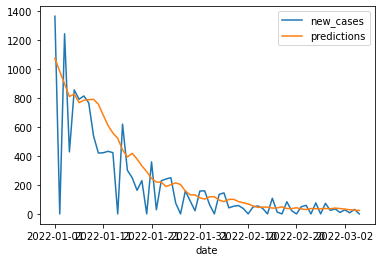

In [121]:
Nigeria_test_imputed['predictions'] = Nigeria_predictions
Nigeria_test_imputed.plot(y=["new_cases", "predictions"])

### CHINA

In [122]:
# As China Data was stationary, no need for log transformation
# A MORE EXHAUSTIVE GRID SEARCH WAS INITIALLY CONDUCTED. TO ENSURE THAT REPEATED RUNNING 
# OF CODE WOULDN'T TAKE TOO LONG, THAT GRID SEARCH ISN'T SHOWN HERE. MORE DETAILS IN REPORT.
China_train_target = China_train_imputed['new_cases']
China_test_target = China_test_imputed['new_cases']
split_index = int(len(China_train_target) * 0.9)
China_train_train_target = China_train_target[:split_index]
China_train_test_target = China_train_target[split_index:]

p_values = [1,2,7]
d_values = [1]
q_values = [1, 2]


warnings.filterwarnings("ignore")
evaluate_models(China_train_train_target, China_train_test_target, p_values, d_values, q_values)
# Best was 7,1,2, with RMSE of 37.726

inf
(1, 1, 1)
(1, 1, 2)
(2, 1, 1)
(2, 1, 2)
(7, 1, 1)
(7, 1, 2)
Best ARIMA(7, 1, 2) MSE=37.726


In [123]:
# MAKE TEST PREDICTIONS
history = [x for x in China_train_target]
China_predictions = list()
for t in range(len(China_test_target)):
    model = ARIMA(history, order=(7,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    China_predictions.append(yhat)
    obs = China_test_target[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=212.819673, expected=191.000000
predicted=193.150068, expected=161.000000
predicted=195.800004, expected=175.000000
predicted=-30052714.093010, expected=91.000000
predicted=173.360737, expected=189.000000
predicted=200.704150, expected=174.000000
predicted=186.410228, expected=159.000000
predicted=183.533898, expected=165.000000
predicted=179.206836, expected=157.000000
predicted=172.400734, expected=192.000000
predicted=171.372199, expected=221.000000
predicted=173.305729, expected=190.000000
predicted=162.831449, expected=201.000000
predicted=168.960223, expected=165.000000
predicted=157.862839, expected=119.000000
predicted=143.092675, expected=223.000000
predicted=175.595816, expected=171.000000
predicted=161.050374, expected=87.000000
predicted=145.404328, expected=66.000000
predicted=141.012979, expected=73.000000
predicted=137.326394, expected=63.000000
predicted=118.386105, expected=58.000000
predicted=107.539548, expected=55.000000
predicted=99.114135, expected=45.00

In [124]:
# TEST RMSE
China_predictions = [max(0, x) for x in China_predictions]
rmse = np.sqrt(mean_squared_error(China_test_target, China_predictions))
rmse

42.22685845354431

<AxesSubplot:xlabel='date'>

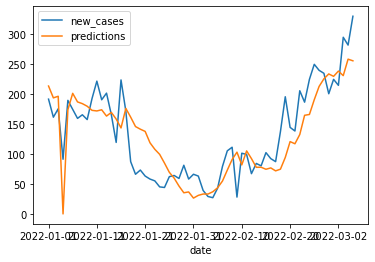

In [125]:
China_test_imputed['predictions'] = China_predictions
China_test_imputed.plot(y=["new_cases", "predictions"])

### AUSTRALIA

<AxesSubplot:xlabel='date'>

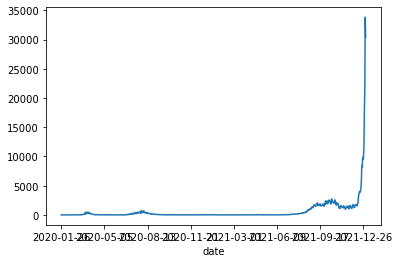

In [126]:
Australia_train_imputed['new_cases'].plot()

In [128]:
# As log is needed for stationarity, we will take log
Australia_train_target = Australia_train_imputed['new_cases']
Australia_test_target = Australia_test_imputed['new_cases']
Australia_train_log = np.log(Australia_train_target)
Australia_test_log = np.log(Australia_test_target)
#Australia_train_log.plot()

In [129]:
split_index = int(len(Australia_train_target) * 0.9)
Australia_train_train_target = Australia_train_log[:split_index]
Australia_train_test_target = Australia_train_log[split_index:]

In [130]:
# Tune using train error, A MORE EXHAUSTIVE GRID SEARCH WAS INITIALLY CONDUCTED. TO ENSURE THAT REPEATED RUNNING 
# OF CODE WOULDN'T TAKE TOO LONG, THAT GRID SEARCH ISN'T SHOWN HERE. MORE DETAILS IN REPORT.
p_values = [1,2,7]
d_values = [1]
q_values = [1,2]


warnings.filterwarnings("ignore")
evaluate_models(Australia_train_train_target, Australia_train_test_target, p_values, d_values, q_values)
# Best was 2,1,1

inf
(1, 1, 1)
(1, 1, 2)
(2, 1, 1)
(2, 1, 2)
(7, 1, 1)
(7, 1, 2)
Best ARIMA(2, 1, 1) MSE=0.240


In [131]:
# FIND RMSE on TRAINING DATASET
history = [x for x in Australia_train_train_target]
Australia_train_predictions = list()
for t in range(len(Australia_train_test_target)):
    model = ARIMA(history, order=(2,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    Australia_train_predictions.append(yhat)
    obs = Australia_train_test_target[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
np.sqrt(mean_squared_error(np.exp(Australia_train_predictions), np.exp(Australia_train_test_target)))

predicted=7.779539, expected=7.540622
predicted=7.760051, expected=7.684324
predicted=7.685176, expected=7.428927
predicted=7.507244, expected=7.487734
predicted=7.571698, expected=7.522941
predicted=7.431449, expected=7.619724
predicted=7.572647, expected=7.542213
predicted=7.552981, expected=7.370860
predicted=7.523643, expected=7.077498
predicted=7.308634, expected=7.290293
predicted=7.236665, expected=7.034388
predicted=7.093333, expected=7.013016
predicted=7.156759, expected=7.337588
predicted=7.083568, expected=7.365180
predicted=7.254075, expected=7.335634
predicted=7.382486, expected=7.234898
predicted=7.298935, expected=7.142037
predicted=7.236827, expected=7.163947
predicted=7.167672, expected=7.090910
predicted=7.123419, expected=7.349874
predicted=7.213575, expected=7.254178
predicted=7.215020, expected=7.280697
predicted=7.336599, expected=7.016610
predicted=7.148836, expected=6.902743
predicted=7.081840, expected=6.921658
predicted=6.906264, expected=7.113142
predicted=6.

2617.94830640694

In [132]:
# Make Test Predictions
history = [x for x in Australia_train_log]
Australia_predictions = list()
for t in range(len(Australia_test_log)):
    model = ARIMA(history, order=(2,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    Australia_predictions.append(yhat)
    obs = Australia_test_log[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=10.240351, expected=10.531002
predicted=10.492346, expected=10.295800
predicted=10.336983, expected=10.708735
predicted=10.567036, expected=11.177383
predicted=10.684372, expected=11.230907
predicted=11.112736, expected=11.267396
predicted=11.259081, expected=11.493661
predicted=11.329281, expected=11.625423
predicted=11.470656, expected=11.195938
predicted=11.455711, expected=11.448984
predicted=11.439395, expected=11.343417
predicted=11.263595, expected=12.074089
predicted=11.698350, expected=11.761230
predicted=11.675250, expected=11.365446
predicted=11.842524, expected=11.633965
predicted=11.507236, expected=11.000282
predicted=11.298473, expected=11.342789
predicted=11.382551, expected=11.345867
predicted=11.122624, expected=11.121422
predicted=11.353620, expected=11.065716
predicted=11.143222, expected=10.672808
predicted=10.928392, expected=11.115161
predicted=10.963274, expected=10.380777
predicted=10.649745, expected=10.968578
predicted=10.922242, expected=10.876537


In [133]:
#TEST RMSE
rmse = np.sqrt(mean_squared_error(Australia_test_imputed['new_cases'], np.exp(Australia_predictions)))
rmse

18832.254997360265

<AxesSubplot:xlabel='date'>

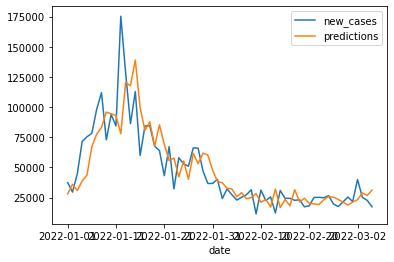

In [134]:
Australia_test_imputed['predictions'] = np.exp(Australia_predictions)
Australia_test_imputed.plot(y=["new_cases", "predictions"])